In [1]:
import numpy as np

from hazma.scalar_mediator import ScalarMediator
from hazma.pseudo_scalar_mediator import PseudoScalarMFV
from hazma.vector_mediator import VectorMediator
from hazma.parameters import muon_mass as mmu
from utilities import get_tex_label, get_color, latex_text_width_1col

Altarelli-Parisi approximation

In [2]:
def ap_approx(e_gam, mass, e_cm):
    x0 = 2. * e_gam / e_cm
    eps = 2 * mass / e_cm
    pre_fac = 1.0 / (137.0 * np.pi) * 2. / e_cm
    split_func = (1. + (1. - x0)**2) / x0
    log_sup = (-1. + np.log(4. * (1 - x0) / eps**2))
    
    return pre_fac * split_func * log_sup

## Muon FSR

In [3]:
sm = ScalarMediator(mx=100, ms=1e3, gsxx=1., gsff=1., gsGG=1., gsFF=1.)
psm = PseudoScalarMFV(mx=100, mp=1e3, gpxx=1., gpll=1., gpGG=0., gpFF=0., gpuu=0., gpdd=0.)
vm = VectorMediator(mx=100, mv=1e3, gvxx=1., gvuu=1., gvdd=-1., gvss=0., gvee=0., gvmumu=1.)

e_cms = np.array([2*110., 2*125., 2*150., 2*250.])
e_gams = np.logspace(0, np.log10(3e2), num=150)

/Users/acoogan/.pyenv/versions/2.7.13/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


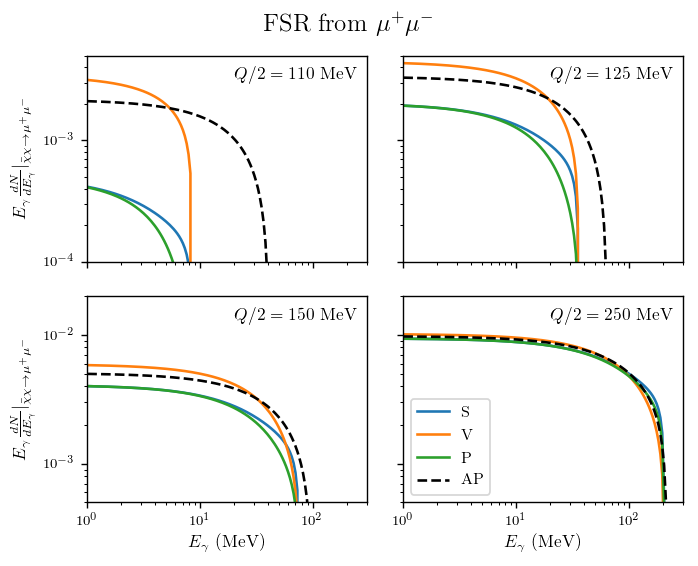

In [20]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row',
                        figsize=(latex_text_width_1col, 0.8*latex_text_width_1col),
                        squeeze=True)

for i, ax in enumerate(axs.flatten()):
    e_cm = e_cms[i]
    
    # Plot spectra
    ax.loglog(e_gams, e_gams * sm.dnde_mumu(e_gams, e_cm, "FSR"), label="S")
    ax.loglog(e_gams, e_gams * vm.dnde_mumu(e_gams, e_cm, "FSR"), label="V")
    ax.loglog(e_gams, e_gams * psm.dnde_mumu(e_gams, e_cm, "FSR"), label="P")
    # Plot AP approximation
    ax.loglog(e_gams, e_gams * ap_approx(e_gams, mmu, e_cm), '--k', label="AP")
    
    # Formatting
    ax.set_xlim(e_gams[[0, -1]])
    
    if i in [0, 1]:
        ax.text(2e1, 3.2e-3, r"$Q/2 = %i$ MeV" % (0.5*e_cm), fontsize=10)
        ax.set_ylim(1e-4, 5e-3)
    else:
        ax.text(2e1, 1.3e-2, r"$Q/2 = %i$ MeV" % (0.5*e_cm), fontsize=10)
        ax.set_ylim(5e-4, 2e-2)
    
    if i == 3:
        ax.legend(loc="lower left")
    
    if i in [2, 3]:
        ax.set_xlabel(r"$E_\gamma$ (MeV)")
    if i in [0, 2]:
        ax.set_ylabel(r"$E_\gamma \frac{dN}{dE_\gamma} |_{\bar{\chi}\chi \to \mu^+ \mu^-}$")
    
plt.suptitle("FSR from $\mu^+ \mu^-$")

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("figures/muon_fsr.pdf")

## Pion FSR

In [21]:
sm = ScalarMediator(mx=100, ms=1e3, gsxx=1., gsff=1., gsGG=1., gsFF=1.)
vm = VectorMediator(mx=100, mv=1e3, gvxx=1., gvuu=1., gvdd=-1., gvss=0., gvee=0., gvmumu=1.)

e_cms = np.array([2*150., 2*250.])
e_gams = np.logspace(0, np.log10(3e2), num=150)

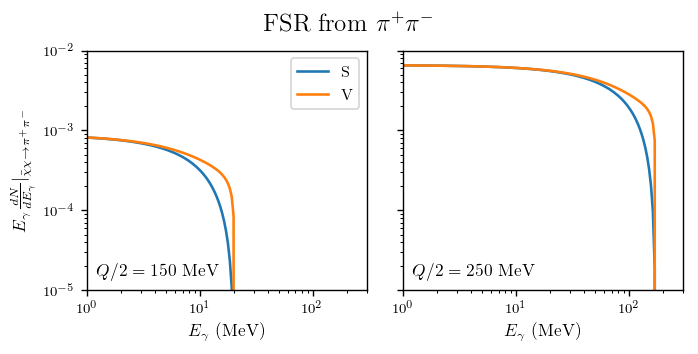

In [28]:
fig, axs = plt.subplots(1, 2, sharex='col', sharey='row',
                        figsize=(latex_text_width_1col, 0.5*latex_text_width_1col),
                        squeeze=True)

for i, ax in enumerate(axs.flatten()):
    e_cm = e_cms[i]
    
    # Plot spectra
    ax.loglog(e_gams, e_gams * sm.dnde_charged_pion(e_gams, e_cm, "FSR"),
              label="S")
    ax.loglog(e_gams, e_gams * vm.dnde_pipi(e_gams, e_cm, "FSR"),
              label="V")
    # Plot AP approximation
#     ax.loglog(e_gams, e_gams * ap_approx(e_gams, mmu, e_cm), label="AP")
    
    # Formatting
    ax.set_xlim(e_gams[[0, -1]])
    ax.set_ylim(1e-5, 1e-2)
    ax.text(1.2, 1.5e-5, r"$Q/2 = %i$ MeV" % (0.5*e_cm), fontsize=10)
    ax.set_xlabel(r"$E_\gamma$ (MeV)")
    
    if i == 0:
        ax.set_ylabel(r"$E_\gamma \frac{dN}{dE_\gamma} |_{\bar{\chi}\chi \to \pi^+ \pi^-}$")
        ax.legend(loc="upper right")

plt.suptitle("FSR from $\pi^+ \pi^-$")

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("figures/pion_fsr.pdf")